## Домашнее задание

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

**1. (*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)**

In [3]:
def svd(X, n_components=2):
    U, Sigma, Vh = np.linalg.svd(X, full_matrices=False, compute_uv=True)
    D = np.diag(Sigma)

    D = D[:, :n_components]
    V = Vh[:n_components, :]
    
#     X_svd = np.dot(U, np.dot(D, V)) # reconstruct matrix 
    return X.dot(V.T)

In [4]:
Z = svd(X)
Z.shape

(150, 2)

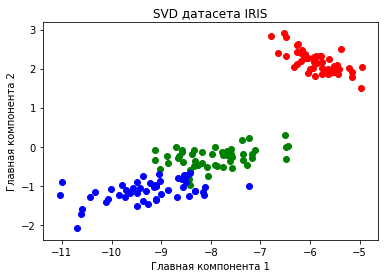

In [5]:
plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('SVD датасета IRIS')
plt.show()

**2. (*) Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.**

In [6]:
def pca(X):
    X_ = X.astype(float)
    rows, cols = X_.shape

    means = X_.mean(0)
    for i in range(rows):
        for j in range(cols):
            X_[i, j] -= means[j]

    std = np.std(X_, axis=0)
    for i in range(cols):
        for j in range(rows):
            X_[j][i] /= std[i]

    covariance_matrix = X_.T.dot(X_)
    eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

    # сформируем список кортежей (собственное значение, собственный вектор)
    eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)    
    W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

    return X_.dot(W)

Z = pca(X)
Z.shape

(150, 2)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def getScore(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    clf = LogisticRegression(random_state=0, solver='liblinear', multi_class='auto').fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
    return clf.score(X_test, y_test)

print(f'Score for TEST part without PCA = {getScore(X, y):0.3f}')
print(f'Score for TEST part WITH PCA = {getScore(Z, y):0.3f}')


Score for TEST part without PCA = 0.833
Score for TEST part WITH PCA = 0.867
